In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('/content/city_day.csv')

In [7]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
#df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory
26218,Thiruvananthapuram,2020-05-01,17.58,37.49,2.56,7.84,9.34,4.85,0.45,7.10,31.16,NaN,NaN,NaN,82.0,Satisfactory


In [9]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [10]:
df.shape

(26219, 16)

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [0]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace= True)
df['NO'].fillna(df['NO'].mean(), inplace= True)
df['NO2'].fillna(df['NO2'].mean(), inplace= True)
df['NOx'].fillna(df['NOx'].mean(), inplace= True)
df['NH3'].fillna(df['NH3'].mean(), inplace= True)
df['CO'].fillna(df['CO'].mean(), inplace= True)
df['SO2'].fillna(df['SO2'].mean(), inplace= True)
df['O3'].fillna(df['O3'].mean(), inplace= True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace= True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace= True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace= True)
df['AQI'].fillna(df['AQI'].mean(), inplace= True)

In [0]:
df  = df.drop(['AQI_Bucket','PM10'], axis = 1)

In [14]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df = df.sort_index()


In [17]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,71.828907,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908
1,Ahmedabad,2015-01-02,71.828907,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908
2,Ahmedabad,2015-01-03,71.828907,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908
3,Ahmedabad,2015-01-04,71.828907,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908
4,Ahmedabad,2015-01-05,71.828907,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908


In [18]:
df['City'].value_counts()

Delhi                 1948
Lucknow               1948
Bengaluru             1948
Chennai               1948
Mumbai                1948
Ahmedabad             1948
Hyderabad             1945
Patna                 1797
Gurugram              1618
Amritsar              1160
Jorapokhar            1108
Jaipur                1053
Thiruvananthapuram    1051
Amaravati              890
Brajrajnagar           877
Talcher                864
Kolkata                753
Guwahati               441
Shillong               249
Chandigarh             243
Bhopal                 228
Kochi                  101
Ernakulam              101
Aizawl                  52
Name: City, dtype: int64

# Forecasting for jaipur

before corona

In [0]:
df_jaipur= df[df['City'] == 'Jaipur']
df_jaipur = df_jaipur.drop('City' , axis = 1)
df_jaipur.set_index('Date', inplace=True)


In [20]:
df_jaipur.shape

(1053, 12)

In [21]:
df_jaipur.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2017-06-14,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-15,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-16,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-17,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-18,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908


In [0]:
df_jaipur_before_covid = df_jaipur.loc['2016-01-01' : '2020-03-23' ]
df_jaipur_after_covid = df_jaipur.loc['2020-03-24' : ]

In [23]:
df_jaipur_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2017-06-14,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-15,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-16,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-17,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-18,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908


In [24]:
df_jaipur_before_covid.shape

(1014, 12)

In [0]:
df_jaipur_before_covid=  df_jaipur_before_covid.resample('W').mean()

In [26]:
df_jaipur_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2017-06-18,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
2017-06-25,51.780000,16.666075,3.985714,33.657667,5.855714,0.738571,8.761429,23.870000,0.471447,1.527113,3.155895,108.691558
2017-07-02,28.937143,8.460722,8.435586,33.657667,7.867475,0.834286,8.957143,3.442857,0.967181,2.932798,3.155895,66.000000
2017-07-09,54.115714,3.264286,8.811429,33.657667,10.898571,0.701429,9.352857,1.297143,0.000000,0.191429,3.155895,90.857143
2017-07-16,45.830000,8.068933,15.652729,33.657667,6.565166,0.998571,9.332857,1.701429,2.357237,6.449853,3.155895,82.714286


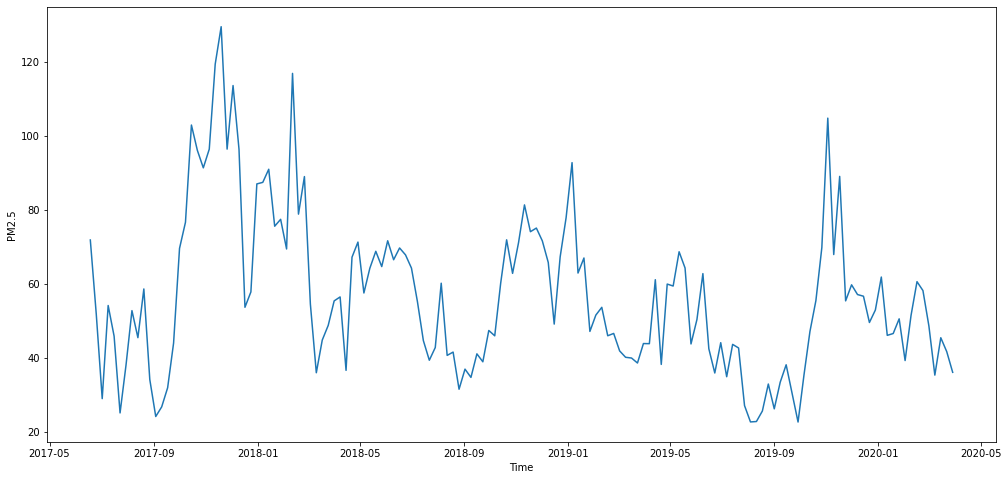

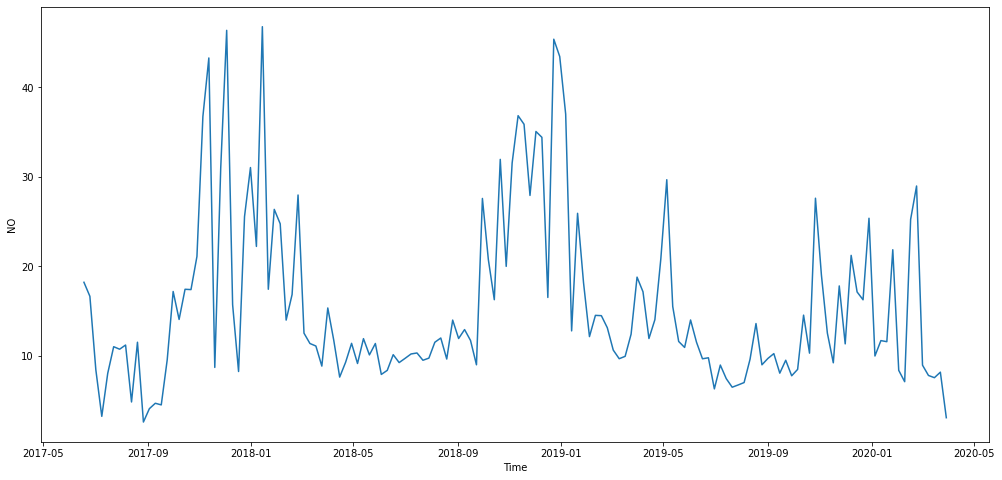

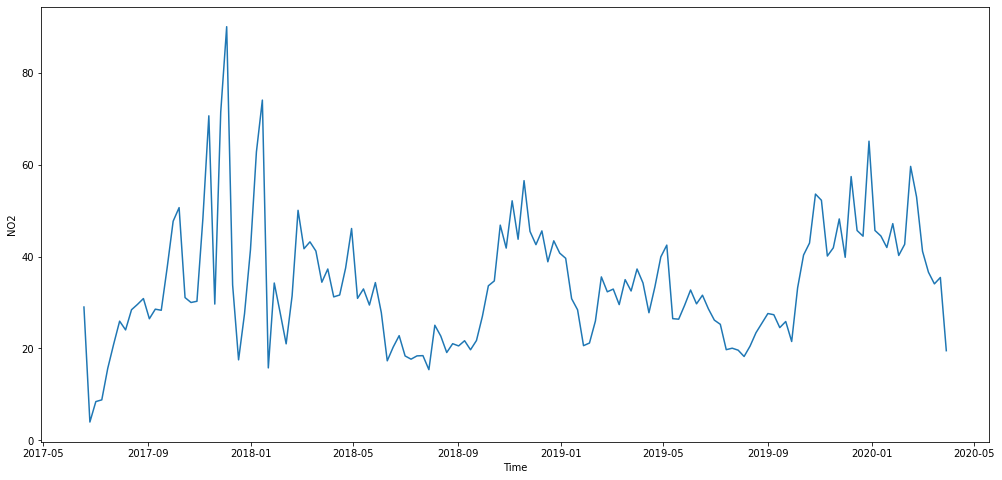

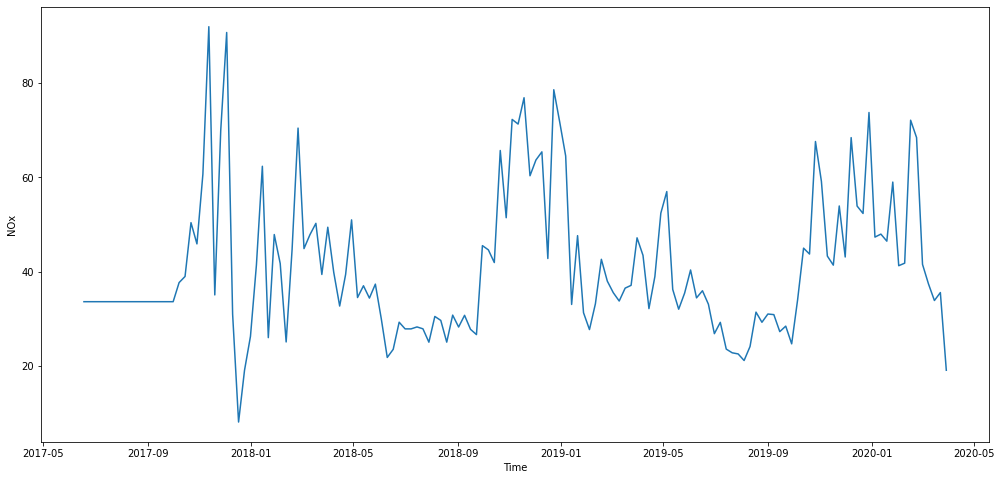

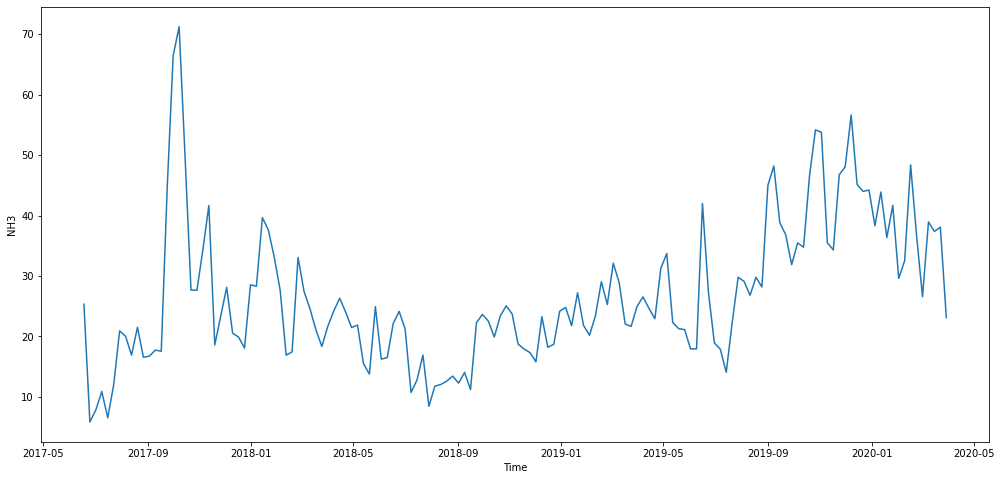

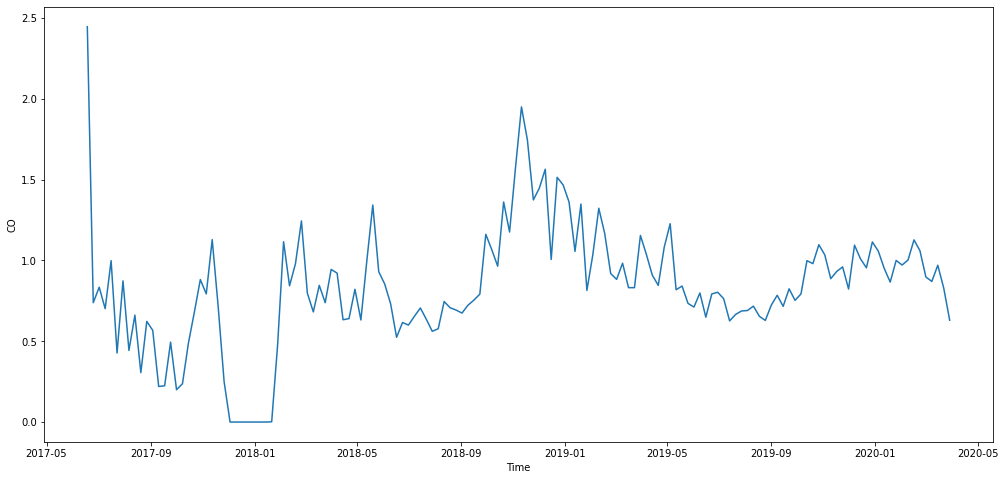

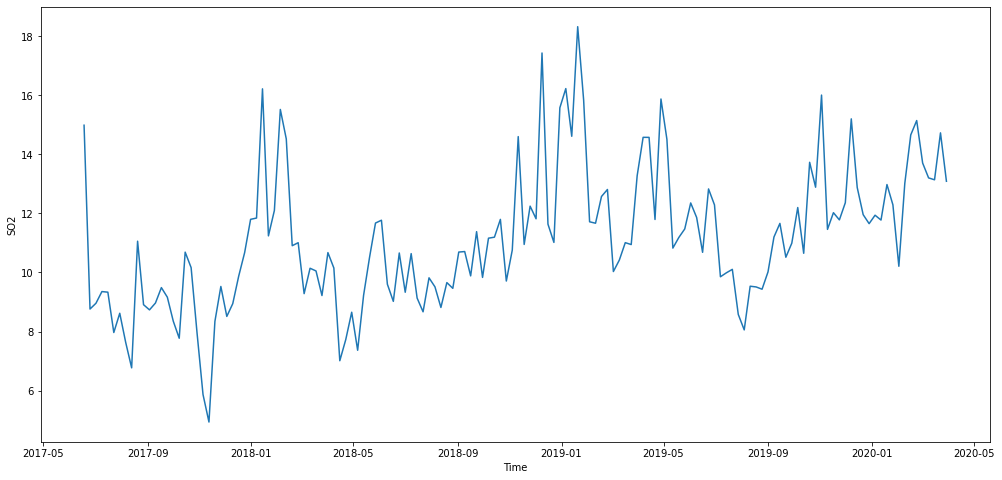

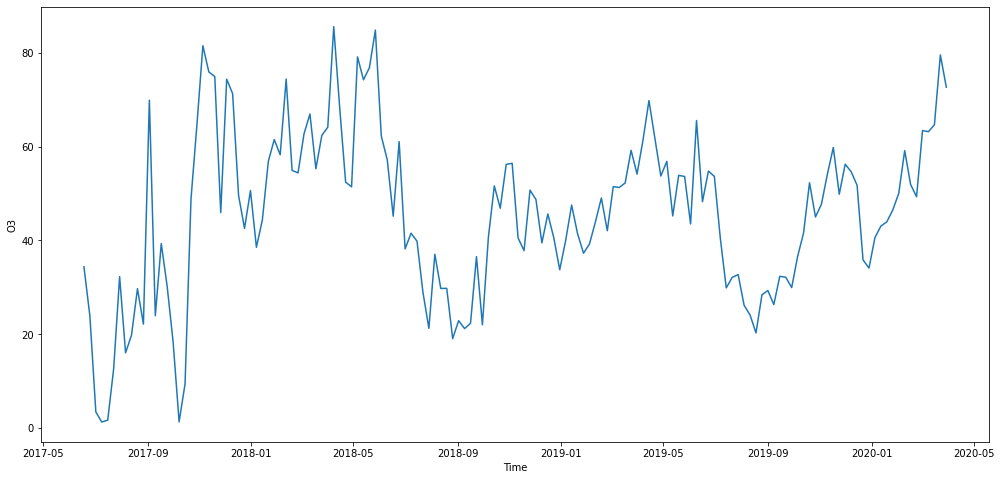

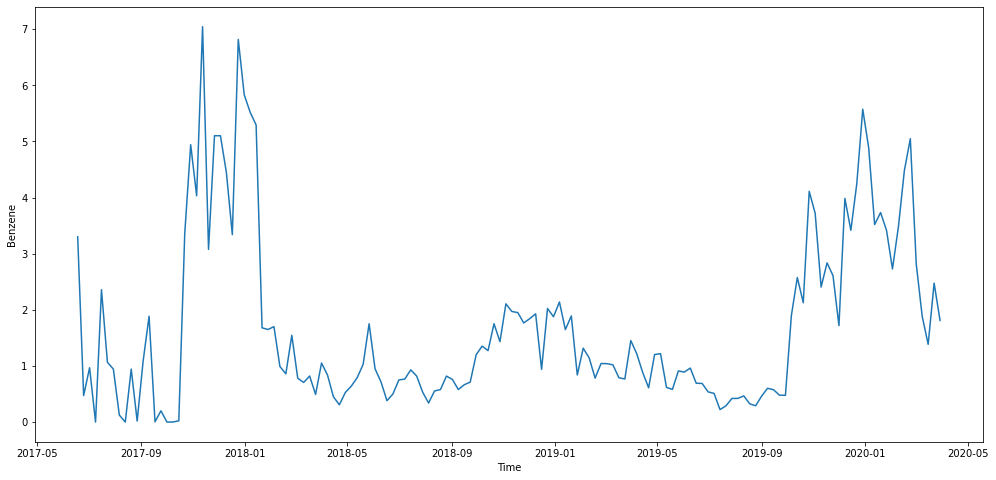

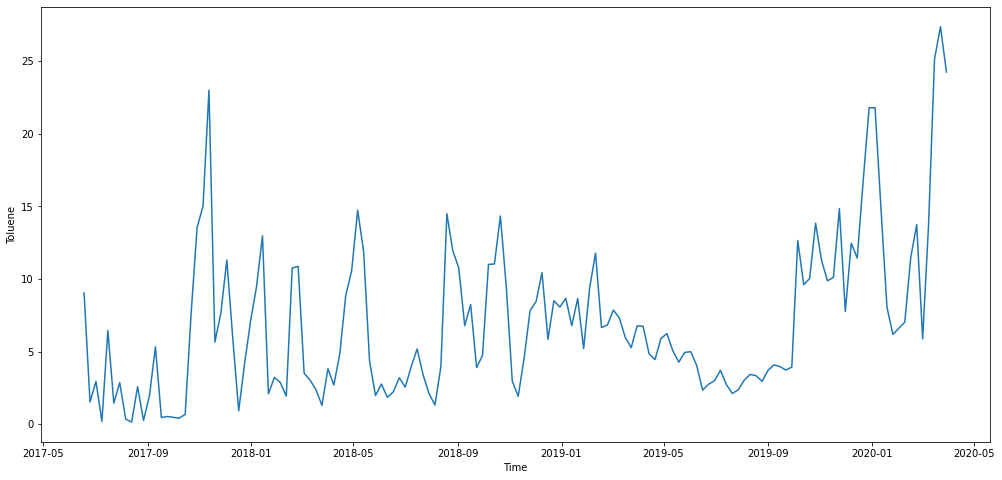

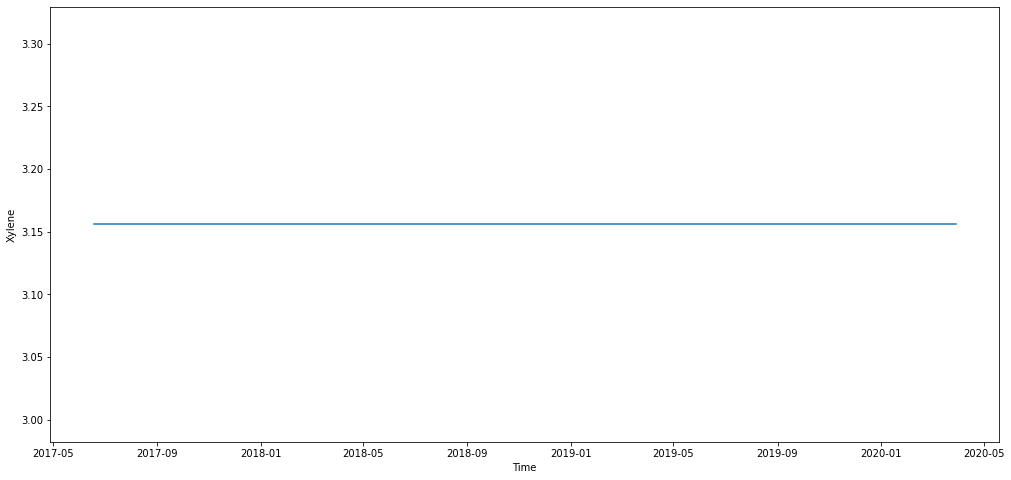

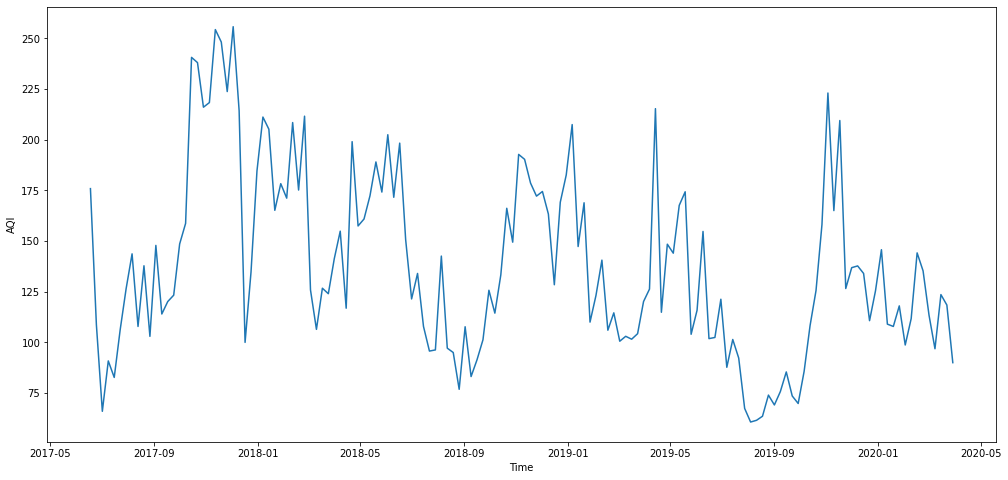

In [27]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_jaipur_before_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_jaipur_before_covid.columns:
    plot_data(col)

In [28]:
df_jaipur_before_covid = df_jaipur_before_covid.reset_index()
df_jaipur_before_covid = df_jaipur_before_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_jaipur_before_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2017-06-18,71.828907,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908


# Modeling on before dataset

In [0]:
train  = df_jaipur_before_covid

cols = train.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [31]:
train = train[cols]
train_y = train[['ds','y']]
train_y.head(3)

,ds,y
0,2017-06-18,175.840908
1,2017-06-25,108.691558
2,2017-07-02,66.000000


In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [0]:
m = Prophet()

In [0]:
#m.add_regressor('PM2.5')
#m.add_regressor('NO')
#m.add_regressor('NO2')
#m.add_regressor('NOx')
#m.add_regressor('NH3')
#m.add_regressor('CO')
#m.add_regressor('SO2')
#m.add_regressor('O3')
#m.add_regressor('Benzene')
#m.add_regressor('Toluene')
#m.add_regressor('Xylene')

In [35]:
m.fit(train_y)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
506,2021-03-25,80.254529,36.761529,98.929831,80.235993,80.273774,-12.784292,-12.784292,-12.784292,-12.784292,-12.784292,-12.784292,0.0,0.0,0.0,67.470237
507,2021-03-26,80.186581,38.083855,100.457287,80.167958,80.205983,-11.027047,-11.027047,-11.027047,-11.027047,-11.027047,-11.027047,0.0,0.0,0.0,69.159534
508,2021-03-27,80.118633,40.469000,100.048416,80.099922,80.138132,-9.315855,-9.315855,-9.315855,-9.315855,-9.315855,-9.315855,0.0,0.0,0.0,70.802778
509,2021-03-28,80.050685,40.634219,102.954958,80.031887,80.070259,-7.671129,-7.671129,-7.671129,-7.671129,-7.671129,-7.671129,0.0,0.0,0.0,72.379556
510,2021-03-29,79.982737,43.926648,102.896555,79.963851,80.002403,-6.109296,-6.109296,-6.109296,-6.109296,-6.109296,-6.109296,0.0,0.0,0.0,73.873440


In [37]:
train_nox = train[['ds','NOx']]
train_nox = train_nox.rename({'NOx':'y'},axis=1)
m = Prophet()
m.fit(train_nox)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
506,2021-03-25,39.820921,24.080842,51.424863,39.820713,39.821138,-2.123190,-2.123190,-2.123190,-2.123190,-2.123190,-2.123190,0.0,0.0,0.0,37.697731
507,2021-03-26,39.819738,23.965997,52.690481,39.819529,39.819956,-2.063083,-2.063083,-2.063083,-2.063083,-2.063083,-2.063083,0.0,0.0,0.0,37.756655
508,2021-03-27,39.818555,23.433765,52.534750,39.818345,39.818774,-2.026431,-2.026431,-2.026431,-2.026431,-2.026431,-2.026431,0.0,0.0,0.0,37.792124
509,2021-03-28,39.817372,23.288001,51.477941,39.817161,39.817592,-2.016246,-2.016246,-2.016246,-2.016246,-2.016246,-2.016246,0.0,0.0,0.0,37.801126
510,2021-03-29,39.816189,24.281583,52.190697,39.815978,39.816410,-2.033817,-2.033817,-2.033817,-2.033817,-2.033817,-2.033817,0.0,0.0,0.0,37.782372


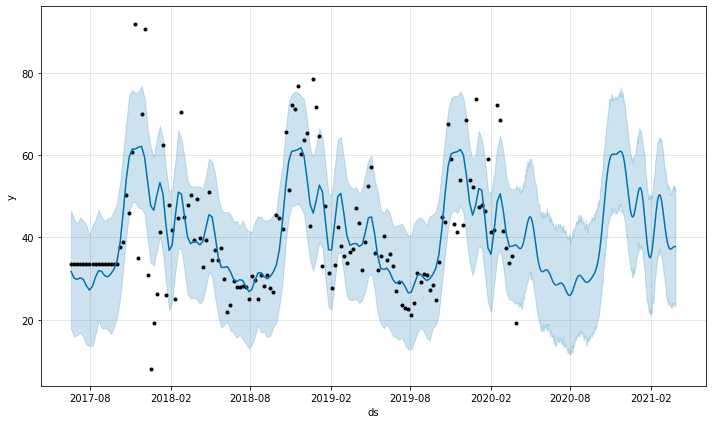

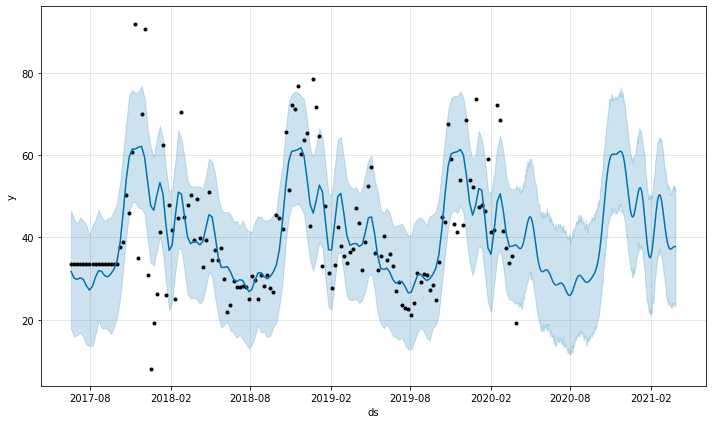

In [39]:
m.plot(forecast)

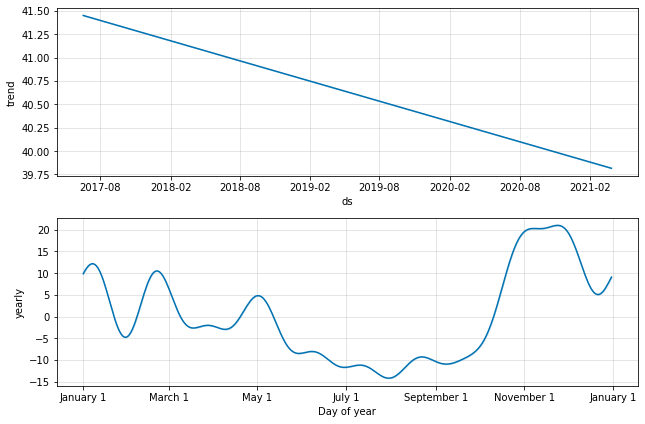

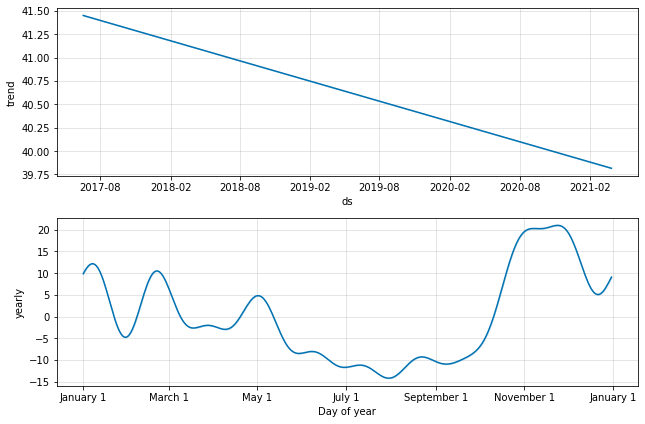

In [40]:
m.plot_components(forecast)

In [41]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(train_nox, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-06-18,31.751190,17.768624,46.543566,33.657667
2017-06-25,30.122715,15.918060,44.374375,33.657667
2017-07-02,29.776689,16.274308,43.281495,33.657667
2017-07-09,30.215849,16.895165,44.871199,33.657667
2017-07-16,29.818165,15.805898,44.043686,33.657667


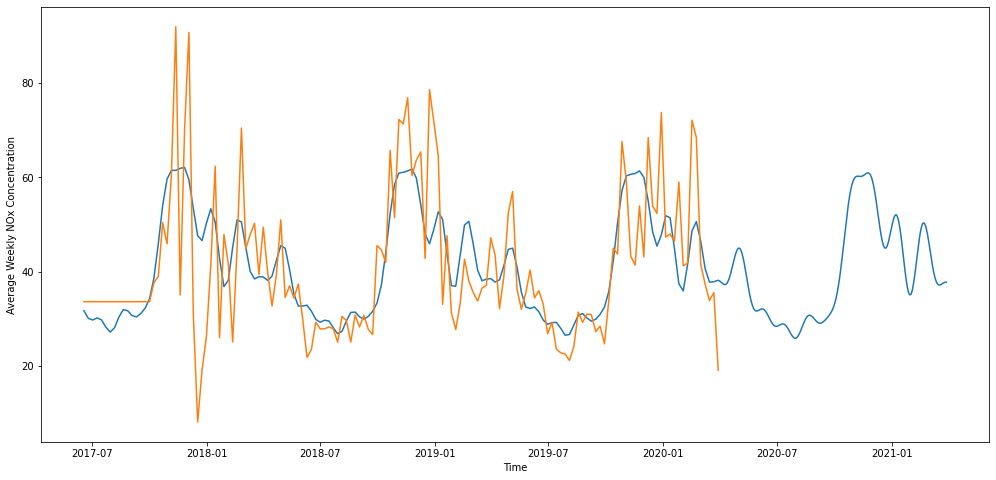

In [42]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])

plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()


# **During corona**

In [43]:
df_jaipur_after_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2020-03-24,34.35,3.77,21.98,21.71,26.06,0.59,11.67,59.98,2.24,29.42,3.155895,92.0
2020-03-25,26.00,3.25,15.39,15.89,21.49,0.50,9.47,47.16,1.84,27.84,3.155895,73.0
2020-03-26,14.28,3.11,11.37,12.15,21.49,0.41,8.44,45.60,0.57,16.93,3.155895,57.0
2020-03-27,9.12,3.22,11.22,12.80,23.28,0.47,10.15,35.10,0.42,27.62,3.155895,52.0
2020-03-28,10.59,3.22,13.15,13.76,24.09,0.51,10.98,38.85,0.39,27.32,3.155895,67.0


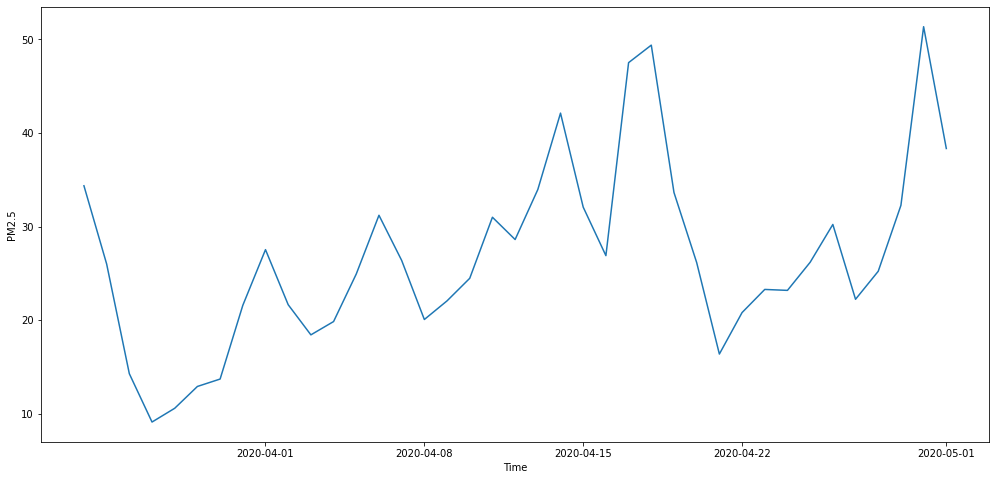

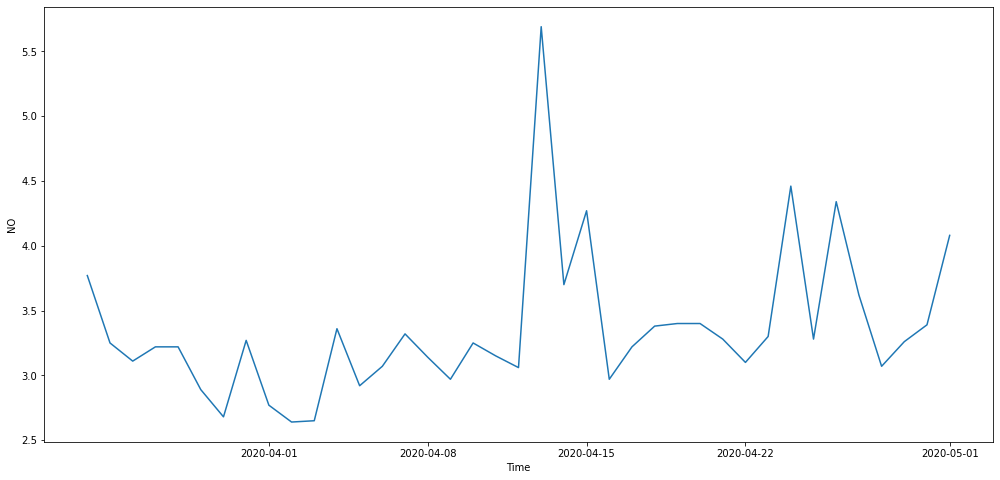

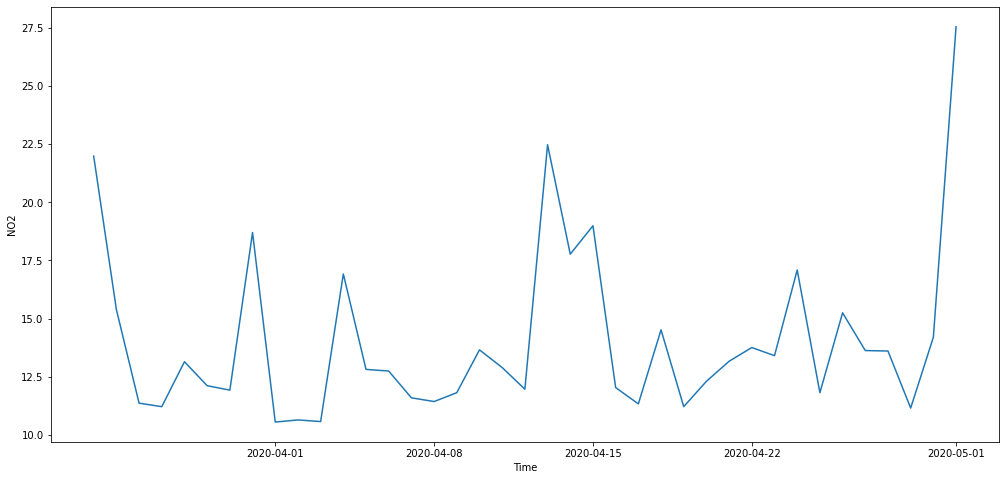

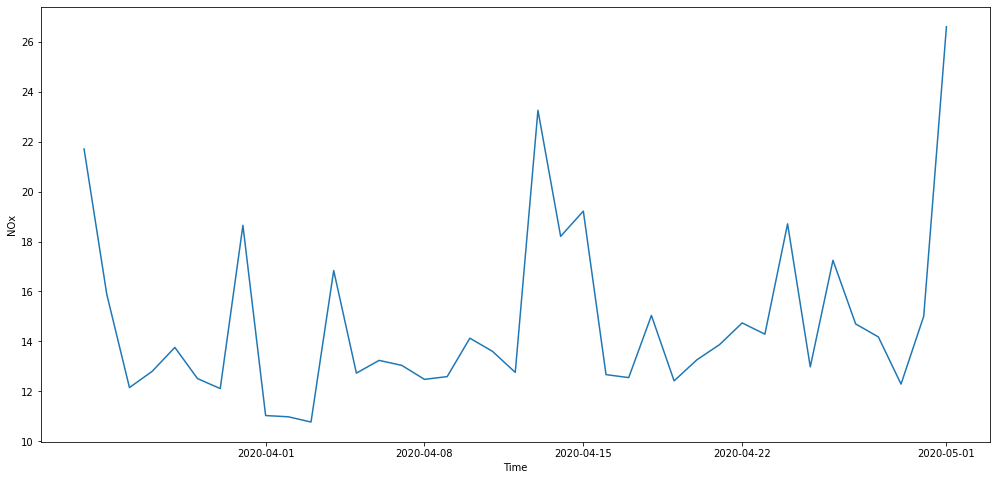

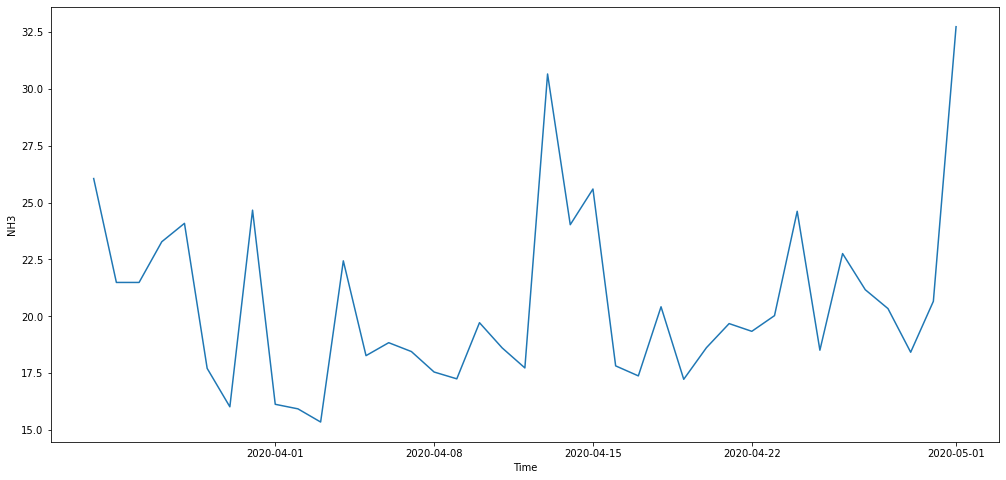

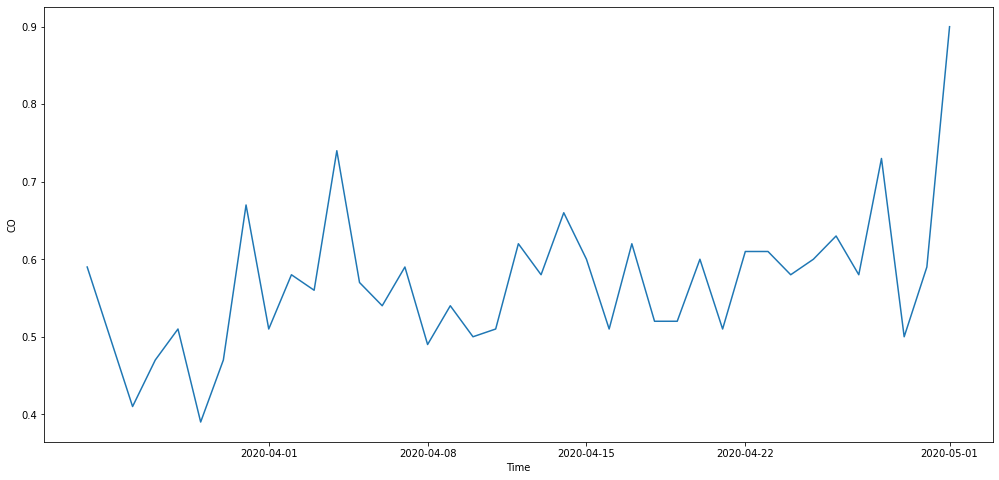

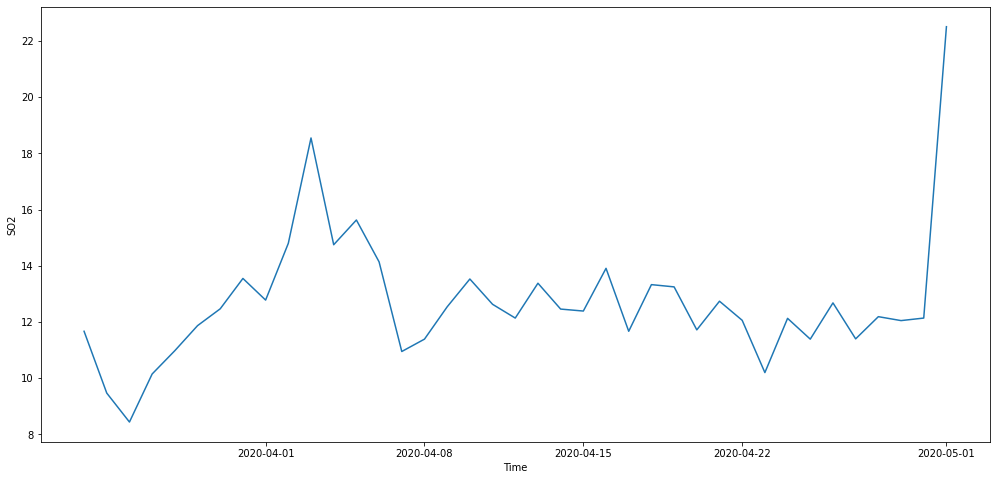

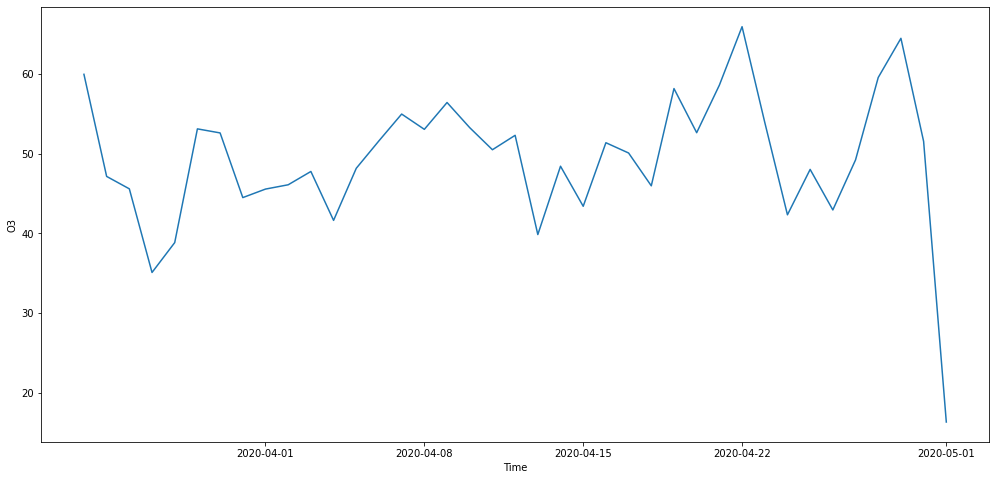

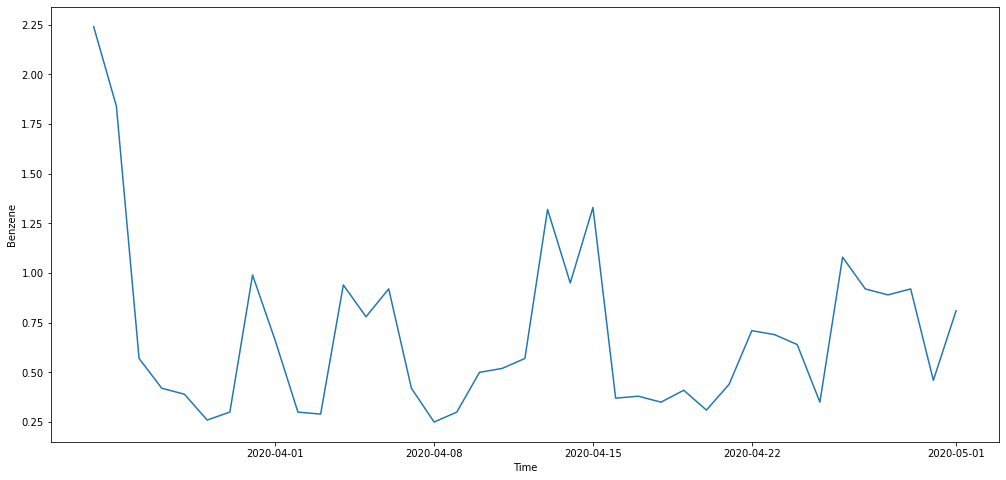

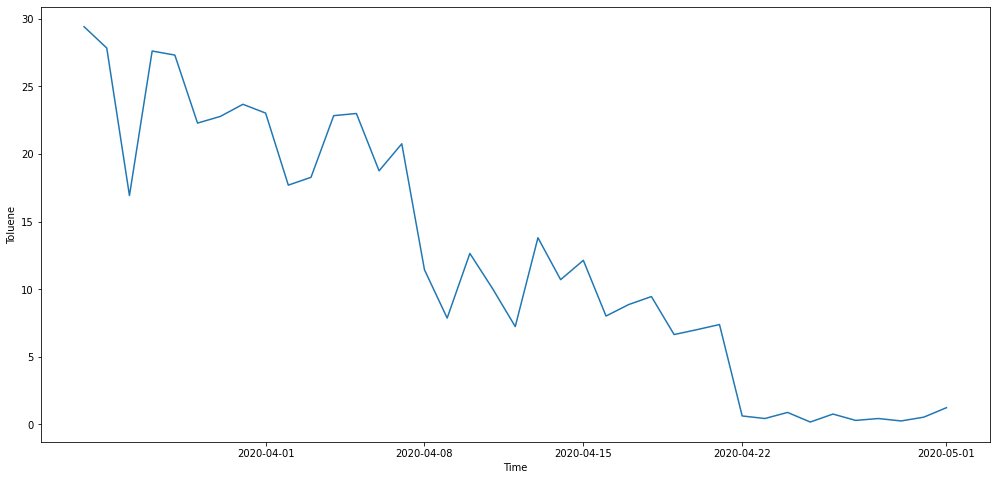

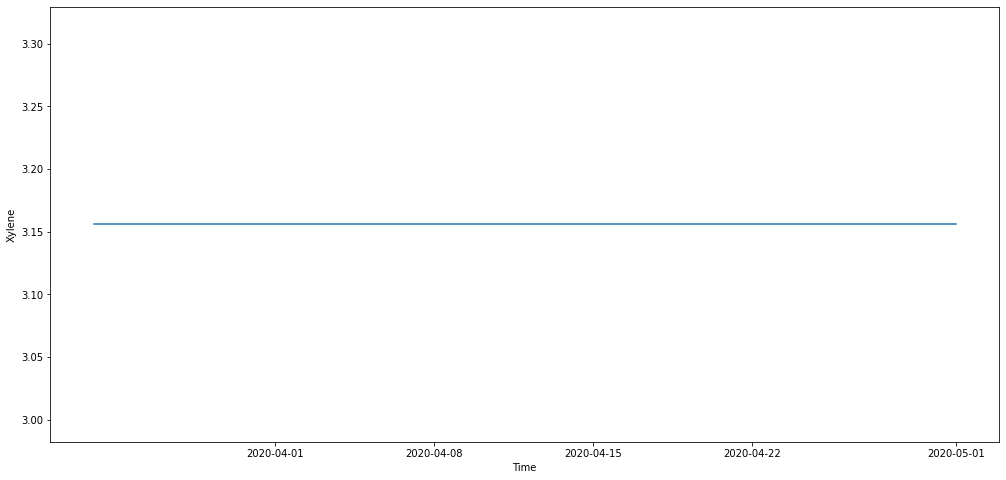

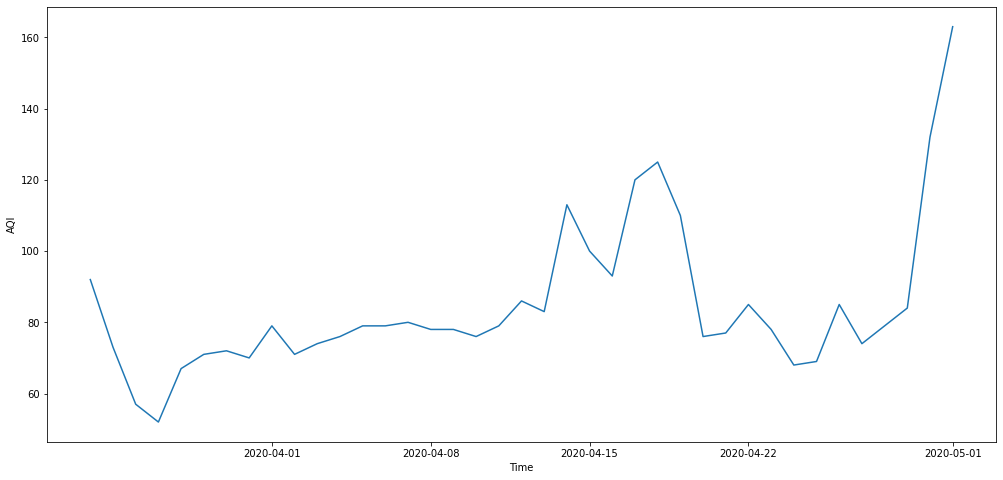

In [44]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_jaipur_after_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_jaipur_after_covid.columns:
    plot_data(col)

In [45]:
df_jaipur_after_covid = df_jaipur_after_covid.reset_index()
df_jaipur_after_covid = df_jaipur_after_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_jaipur_after_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2020-03-24,34.35,3.77,21.98,21.71,26.06,0.59,11.67,59.98,2.24,29.42,3.155895,92.0


In [0]:
tr  = df_jaipur_after_covid

cols = tr.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [48]:
tr_nox = tr[['ds','NOx']]
tr_nox = tr_nox.rename({'NOx':'y'},axis=1)
f1 = Prophet()
f1.fit(tr_nox)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future1 = f1.make_future_dataframe(periods= 40 )
forecast1 = f1.predict(future1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,18.255520,13.582626,21.759738,18.255518,18.255521,-0.213541,-0.213541,-0.213541,-0.213541,-0.213541,-0.213541,0.0,0.0,0.0,18.041979
75,2020-06-07,18.319880,13.380323,21.310580,18.319879,18.319882,-1.188271,-1.188271,-1.188271,-1.188271,-1.188271,-1.188271,0.0,0.0,0.0,17.131610
76,2020-06-08,18.384241,14.743426,22.643229,18.384240,18.384242,0.526995,0.526995,0.526995,0.526995,0.526995,0.526995,0.0,0.0,0.0,18.911236
77,2020-06-09,18.448602,16.465939,24.432820,18.448600,18.448603,1.985289,1.985289,1.985289,1.985289,1.985289,1.985289,0.0,0.0,0.0,20.433890
78,2020-06-10,18.512963,14.319222,22.066462,18.512961,18.512964,-0.414324,-0.414324,-0.414324,-0.414324,-0.414324,-0.414324,0.0,0.0,0.0,18.098638


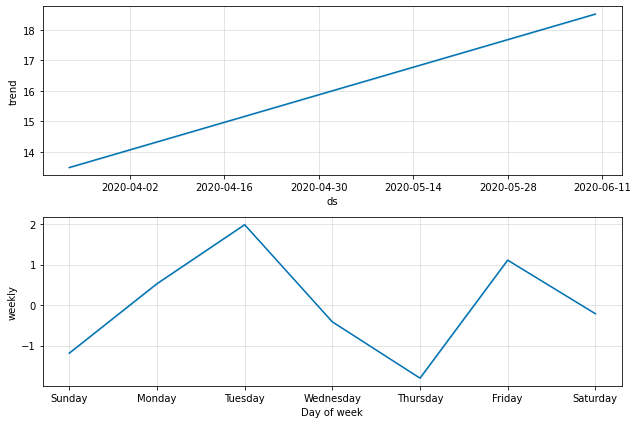

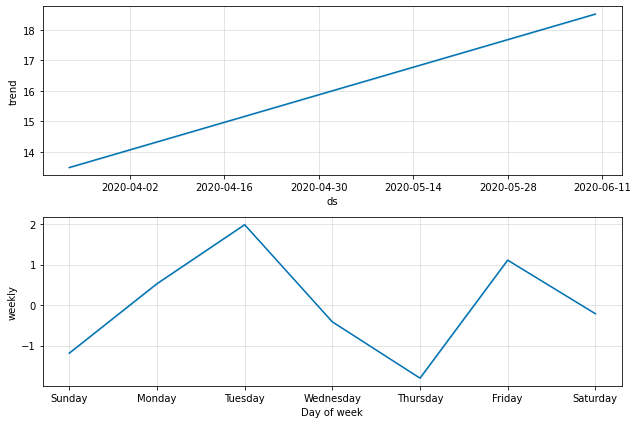

In [50]:
f1.plot_components(forecast1)

In [51]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1 = make_comparison_dataframe(tr_nox, forecast1)

cmp_df1.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,15.478111,11.569041,19.624309,21.71
2020-03-25,13.142859,9.443809,17.175281,15.89
2020-03-26,11.815835,7.777381,15.762547,12.15
2020-03-27,14.795465,10.737026,19.014563,12.80
2020-03-28,13.536724,9.774338,17.513146,13.76


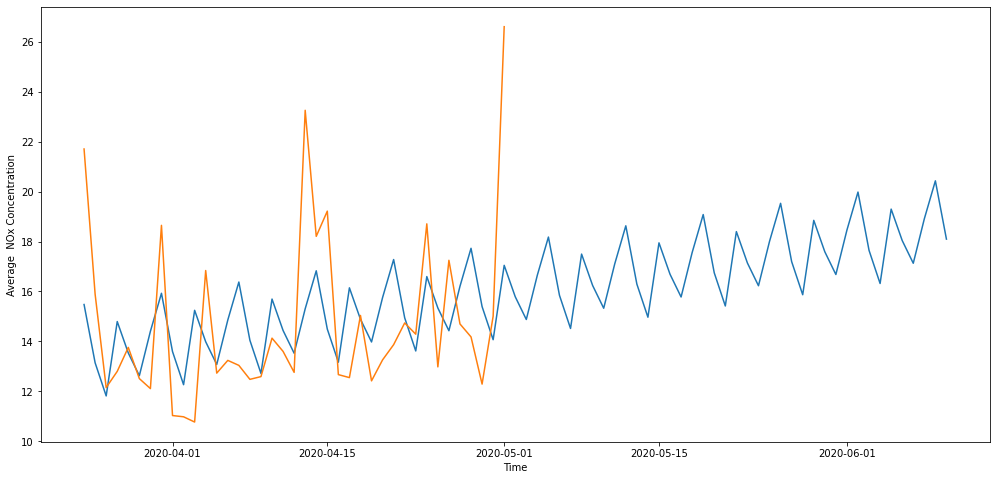

In [52]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1['yhat'])

plt.plot(cmp_df1['y'])
plt.xlabel('Time')
plt.ylabel('Average  NOx Concentration')
plt.grid(False)
plt.show()

**Now will do analysis for SO2 for before and after covid**

In [0]:
# before first

In [54]:
tr1_so2 = train[['ds','SO2']]
tr1_so2 = tr1_so2.rename({'SO2':'y'},axis=1)
s1 = Prophet()
s1.fit(tr1_so2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [55]:
future1_so2 = s1.make_future_dataframe(periods= 365 )
forecast1_so2 = s1.predict(future1_so2)
forecast1_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
506,2021-03-25,13.801946,12.058386,16.425488,13.800641,13.803286,0.540781,0.540781,0.540781,0.540781,0.540781,0.540781,0.0,0.0,0.0,14.342727
507,2021-03-26,13.805027,12.276419,16.639770,13.803717,13.806371,0.628654,0.628654,0.628654,0.628654,0.628654,0.628654,0.0,0.0,0.0,14.433681
508,2021-03-27,13.808108,12.366679,16.807264,13.806794,13.809455,0.705330,0.705330,0.705330,0.705330,0.705330,0.705330,0.0,0.0,0.0,14.513438
509,2021-03-28,13.811188,12.367060,16.893931,13.809871,13.812542,0.769338,0.769338,0.769338,0.769338,0.769338,0.769338,0.0,0.0,0.0,14.580526
510,2021-03-29,13.814269,12.575514,16.731400,13.812947,13.815632,0.819557,0.819557,0.819557,0.819557,0.819557,0.819557,0.0,0.0,0.0,14.633826


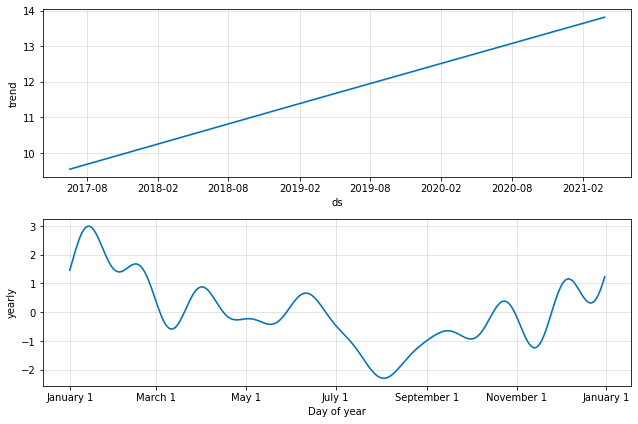

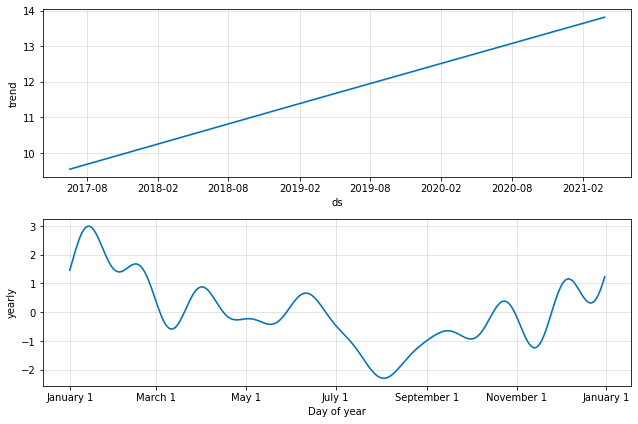

In [56]:
s1.plot_components(forecast1_so2)

In [57]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1_so2 = make_comparison_dataframe(tr1_so2, forecast1_so2)

cmp_df1_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-06-18,9.972416,7.851412,12.164996,14.988734
2017-06-25,9.504467,7.373722,11.559468,8.761429
2017-07-02,9.070063,6.893400,11.214434,8.957143
2017-07-09,8.712109,6.614534,10.865549,9.352857
2017-07-16,8.291083,6.149711,10.449771,9.332857


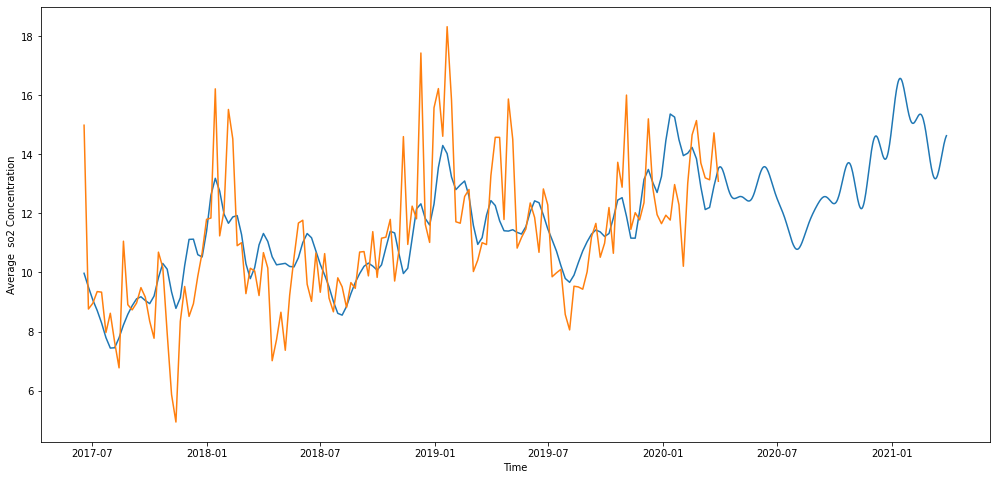

In [58]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1_so2['yhat'])

plt.plot(cmp_df1_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()

In [0]:
# after covid

In [60]:
tr2_so2 = tr[['ds','SO2']]
tr2_so2 = tr_nox.rename({'SO2':'y'},axis=1)
s2 = Prophet()
s2.fit(tr2_so2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future2_so2 = f1.make_future_dataframe(periods= 40 )
forecast2_so2 = f1.predict(future2_so2)
forecast2_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,18.255520,13.969039,22.263564,18.255518,18.255521,-0.213541,-0.213541,-0.213541,-0.213541,-0.213541,-0.213541,0.0,0.0,0.0,18.041979
75,2020-06-07,18.319880,13.103262,20.802838,18.319879,18.319882,-1.188271,-1.188271,-1.188271,-1.188271,-1.188271,-1.188271,0.0,0.0,0.0,17.131610
76,2020-06-08,18.384241,14.887800,22.957381,18.384240,18.384242,0.526995,0.526995,0.526995,0.526995,0.526995,0.526995,0.0,0.0,0.0,18.911236
77,2020-06-09,18.448602,16.538146,24.341068,18.448600,18.448603,1.985289,1.985289,1.985289,1.985289,1.985289,1.985289,0.0,0.0,0.0,20.433890
78,2020-06-10,18.512963,14.133928,22.055090,18.512961,18.512964,-0.414324,-0.414324,-0.414324,-0.414324,-0.414324,-0.414324,0.0,0.0,0.0,18.098638


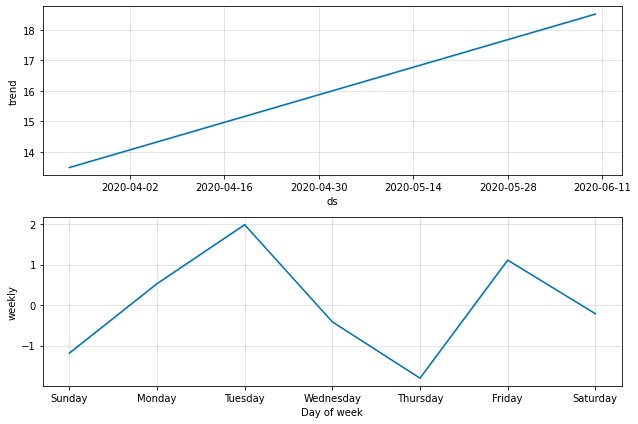

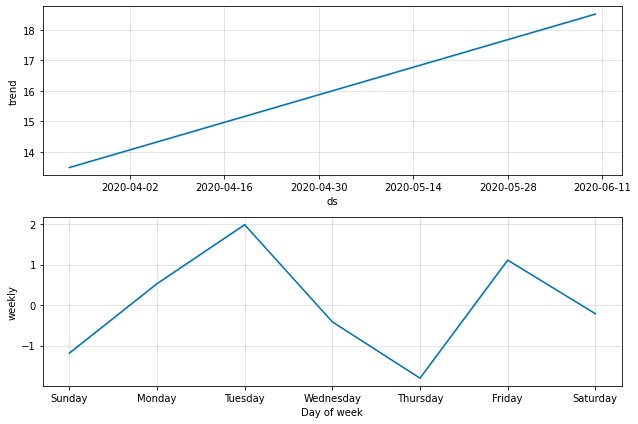

In [62]:
s2.plot_components(forecast2_so2)

In [63]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df2_so2 = make_comparison_dataframe(tr2_so2, forecast2_so2)

cmp_df2_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,15.478111,11.596643,19.302781,21.71
2020-03-25,13.142859,9.055431,17.129608,15.89
2020-03-26,11.815835,7.834193,15.812266,12.15
2020-03-27,14.795465,10.869328,18.805609,12.80
2020-03-28,13.536724,9.648301,17.240095,13.76


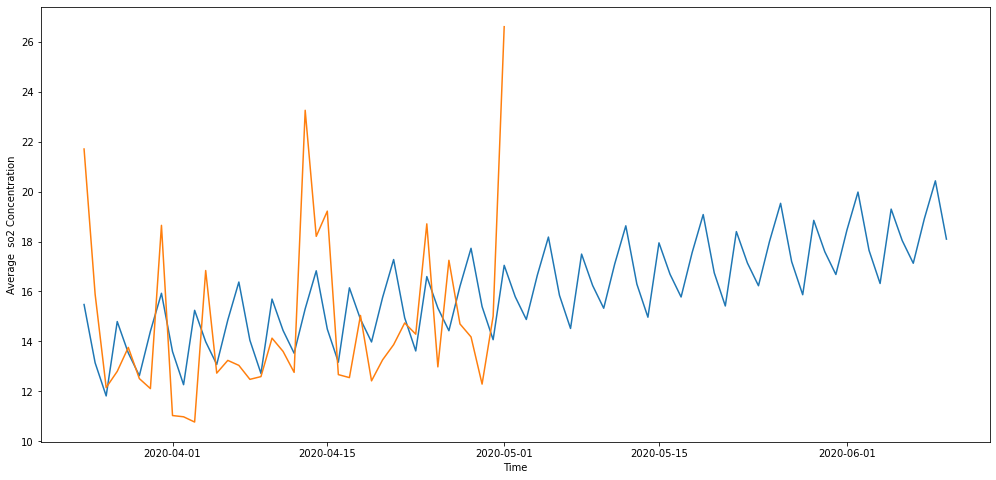

In [64]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df2_so2['yhat'])

plt.plot(cmp_df2_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()